In [28]:
# Boilerplate at top of file
%load_ext autoreload
import rpy2
%load_ext rpy2.ipython
# %autoreload 2
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import datetime
import math

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from ggplot import *



from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [29]:
import sys
sys.path.append('../../../src')
# hack to import runner
sys.path.append('../../opencv-test')
from runner import run_fusion

In [30]:
path_to_data = '../../../src/test_suite/test_cases/case_8_ang/'
files = [path_to_data + 'WHEEL.csv', path_to_data + 'CAMERA.csv']
results = run_fusion(files, has_camera=True, has_wheel=True, write_results=False, move_video=False)

True True
['../../../src/test_suite/test_cases/case_8_ang/WHEEL.csv', '../../../src/test_suite/test_cases/case_8_ang/CAMERA.csv']
338
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 0 0 4 4 4 4 4 4 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 2 4 4 2 2 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 0 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
Start left
End left
Start right
End right
Start left
End left
Start right
End right
[(47, 55, 'left_turn'), (127, 137, 'right_turn'), (209, 221, 'left_turn'), (273, 282, 'right_turn')

In [31]:
head_events_sentiment = results['head_events_sentiment']
head_events_list = results['head_events_list']
head_events_hash = results['head_events_hash']
lane_events_list = results['lane_events_list']
df = results['df']

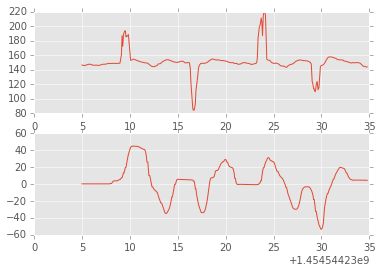

In [32]:
plt.subplot(2,1,1)
plt.plot(df['timestamp_x'], df['noseX'])


plt.subplot(2,1,2)
plt.plot(df['timestamp_x'], df['theta'])

In [33]:
time_thresh = 1 # second
lane_events_sentiment = []
for lane in lane_events_list:
    start_index, end_index, event = lane
    # suitable time frame that turns end index can be in
    max_time = df.loc[int(start_index)]['time'] + time_thresh
    min_time = df.loc[int(start_index)]['time'] - time_thresh
    # all the possible indices of the dataframe that could have the right time stamp
    possible_indice = set(df[(df['time'] > min_time) & (df['time'] < max_time)].index)
    
    # hacky
    # match the <direction>_lane_change to <direction>_turn_end
    end_head_turn_event = event.replace('lane_change', 'turn_end')
    
    end_indice = set(head_events_hash[end_head_turn_event])
    # find the end head turns that match the time threshold
    intersecting_indice = possible_indice & end_indice
    if intersecting_indice:
        # incase there is more than one relevant event
        relevant_end_index = max(intersecting_indice) 
        # hacky
        # match the index values that have 
        # the same ending index and the right event
        head_event_indice= [i for i, (s, e, event) \
                            in enumerate(head_events_list) \
                            if int(e) == relevant_end_index \
                            and event == end_head_turn_event.replace('_end', '')]


        if head_events_sentiment[head_event_indice[0]]:
            print 'good lane change'
            lane_events_sentiment.append((True, ''))
        else:
            print 'bad head turn'
            lane_events_sentiment.append((False, 'Bad head turn'))
            
        
        
        
    else:
        print 'missing head turn'
        lane_events_sentiment.append((False, 'Missing head turn'))

good lane change
missing head turn
missing head turn


In [34]:
# new code has this
results['lane_events_sentiment']

[(True, ''), (False, 'Missing head turn'), (False, 'Missing head turn')]

In [35]:
lane_events_sentiment

[(True, ''), (False, 'Missing head turn'), (False, 'Missing head turn')]